In [ ]:
#Задачи: Линейная регрессия
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
# Вывести значения коэффициентов модели.
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)
# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha.
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

In [ ]:
#SVR
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
# Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'
# Реализовать модель SVRб учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, maxabs_scale
import matplotlib.pyplot as plt


In [40]:


plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
# Загрузка и подготовка данных
df = pd.read_csv("Advertising.csv")
df.drop(columns=df.columns[0], inplace=True)  # Удаление ненужного столбца


features = ['TV', 'radio', 'newspaper']
for i in range(1, len(features) + 1):
    X = df[features[:i]]
    y = df['sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Модель с {i} признаками: Коэффициенты {model.coef_}, Свободный член {model.intercept_}, MSE: {mse}")


Модель с 1 признаками: Коэффициенты [0.04802945], Свободный член 6.91197261886872, MSE: 10.310069587813155
Модель с 2 признаками: Коэффициенты [0.04660234 0.18117959], Свободный член 2.927237320266485, MSE: 1.9262760418667424
Модель с 3 признаками: Коэффициенты [0.04656457 0.17915812 0.00345046], Свободный член 2.87696662231793, MSE: 1.9730456202283377


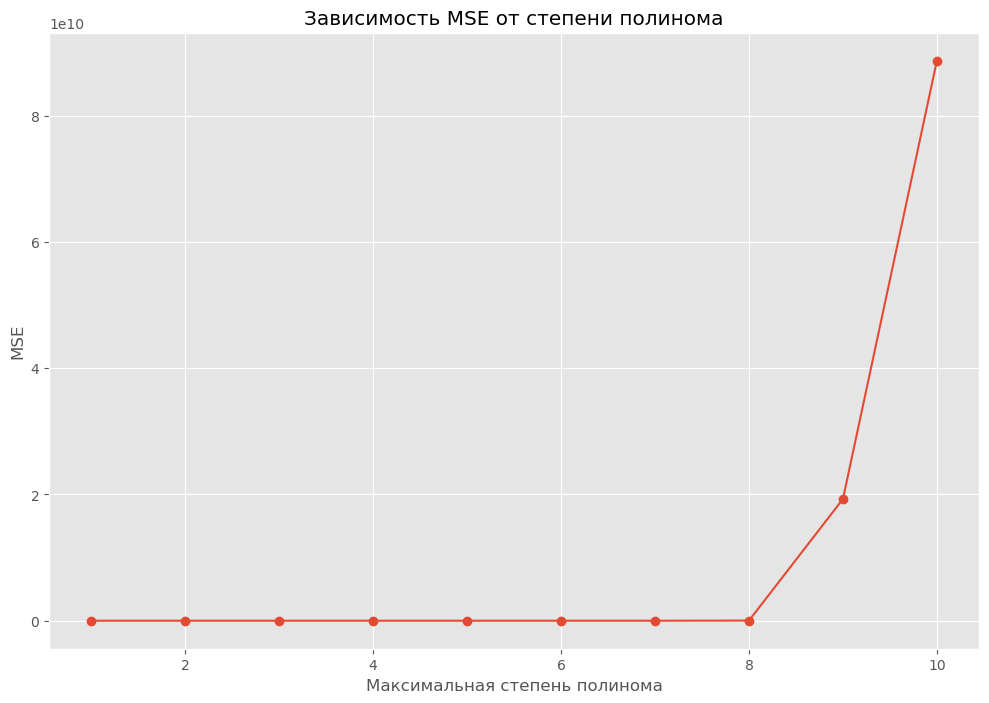

In [55]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']
mse_values = []

for degree in range(1, 11):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(range(1, 11), mse_values, marker='o')
plt.xlabel('Максимальная степень полинома')
plt.ylabel('MSE')
plt.title('Зависимость MSE от степени полинома')
plt.show()


Гребневая регрессия (Ridge)


In [ ]:

best_degree = 5  

mse_alpha, max_coef_alpha = [], []
alpha_values = np.linspace(0.03, 1.0, 16)

poly = PolynomialFeatures(best_degree)
X_poly = poly.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    max_coef = np.max(np.abs(ridge_model.coef_))
    
    mse_alpha.append(mse)
    max_coef_alpha.append(max_coef)


C:\Users\darya\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.8376e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\darya\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.52653e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\darya\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.5693e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\darya\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.61207e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\darya\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211:

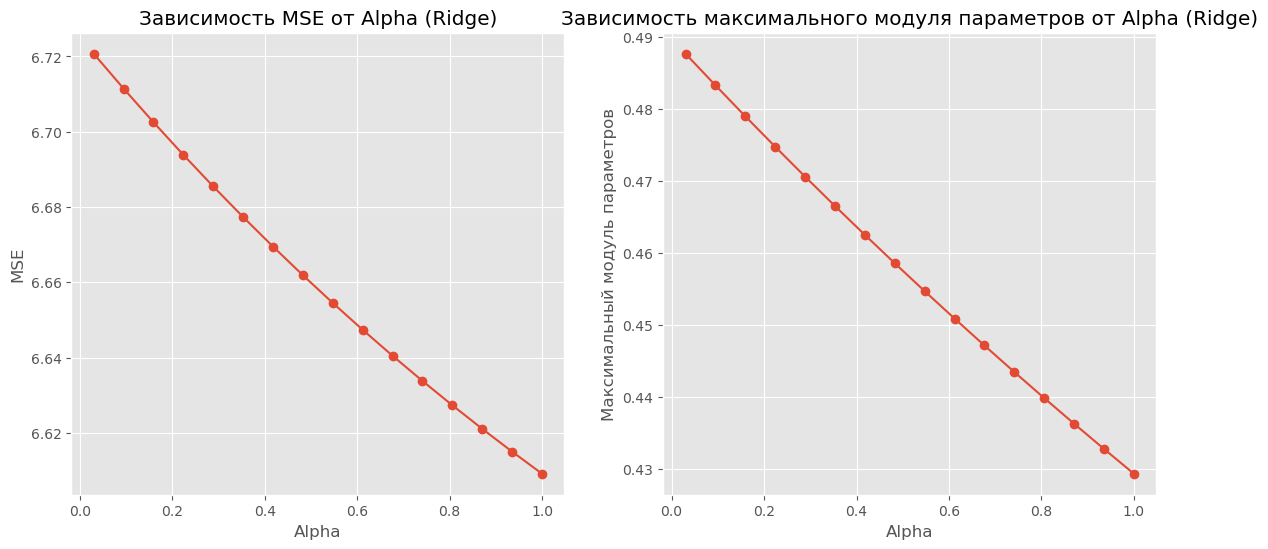

In [61]:

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_alpha, marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Зависимость MSE от Alpha (Ridge)')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, max_coef_alpha, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Максимальный модуль параметров')
plt.title('Зависимость максимального модуля параметров от Alpha (Ridge)')
plt.show()

Лассо-регрессия (Lasso)


In [ ]:
mse_alpha, max_coef_alpha = [], []
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train, y_train)
    
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    max_coef = np.max(np.abs(lasso_model.coef_))
    
    mse_alpha.append(mse)
    max_coef_alpha.append(max_coef)


C:\Users\darya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+01, tolerance: 4.221e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\darya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e+01, tolerance: 4.221e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\darya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.353e+01, toleranc

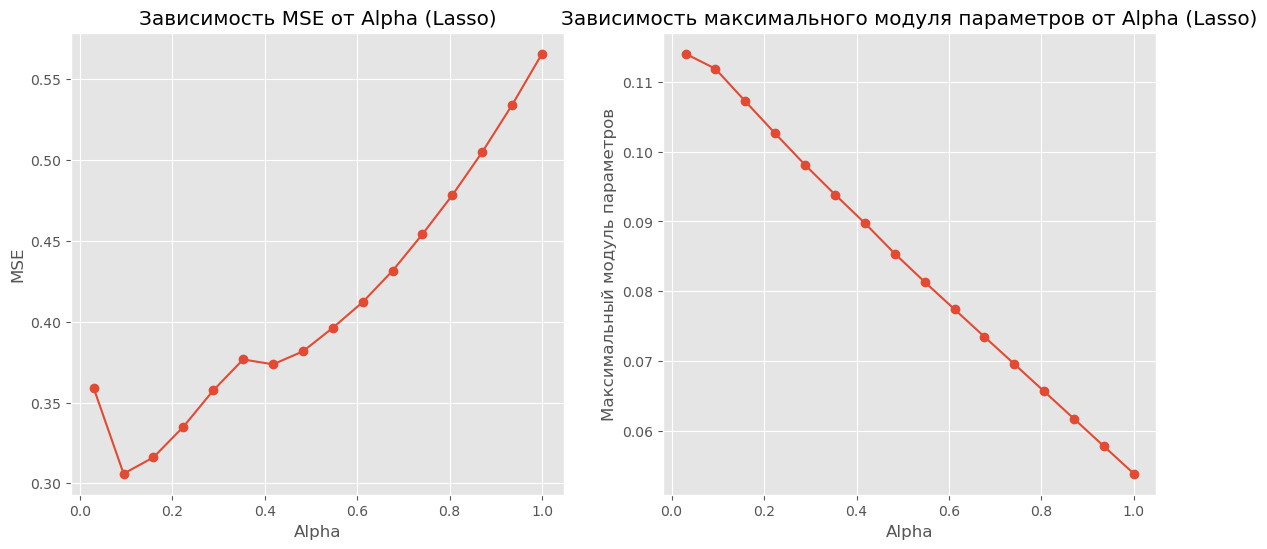

In [62]:

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_alpha, marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Зависимость MSE от Alpha (Lasso)')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, max_coef_alpha, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Максимальный модуль параметров')
plt.title('Зависимость максимального модуля параметров от Alpha (Lasso)')
plt.show()


Support Vector Regression (SVR)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

kernels = ['poly', 'sigmoid']


for kernel in kernels:
    svr_model = SVR(kernel=kernel, C=100, gamma=0.1)
    svr_model.fit(X_train, y_train)
    
    y_pred = svr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"SVR с ядром '{kernel}': MSE = {mse}")


SVR с ядром 'poly': MSE = 6.3296327177760245
SVR с ядром 'sigmoid': MSE = 452.7738610369932
